### Nhập khẩu các thư viện

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

### Đọc tập dữ liệu thành DataFrame

In [2]:
DiabetesDataFrame = pd.read_csv("diabetes.csv")

### Kích cỡ của DataFrame

In [3]:
DiabetesDataFrame.shape

(768, 9)

### Tên các thuộc tính

In [4]:
print(list(DiabetesDataFrame.columns))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


### Loại dữ liệu của từng thuộc tính

In [5]:
DiabetesDataFrame.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Số lượng dòng trùng nhau

In [6]:
numberOfDulplicates = DiabetesDataFrame.duplicated().sum()
print(f"Số lượng dòng trùng: {numberOfDulplicates}")

Số lượng dòng trùng: 0


### Xem xét lỗi trùng các giá trị độc lập nhưng khác lớp

In [7]:
numberOfDulplicatesExceptOutcome = DiabetesDataFrame.loc[:, DiabetesDataFrame.columns != "Outcome"].duplicated().sum()
print(f"Số lượng dòng trùng giá trị biến độc lập {numberOfDulplicatesExceptOutcome}")

Số lượng dòng trùng giá trị biến độc lập 0


### Tính toán giá trị trung bình, độ lệch chuẩn, giá trị tối thiểu, giá trị tại 25%, giá trị trung trị, giá trị tại 75%,giá trị tối đa của các biến số

In [8]:
numericAttributes = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
DiabetesDataFrame.describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"], numericAttributes]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Tính số giá bị thiểu theo thuộc tính và Phần trăm đối tượng chứa giá trị bị thiếu

In [9]:
AttributesContainMissingValues = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
DiabetesDataFrameWithExplicitMissingValues = DiabetesDataFrame.copy(deep =True)
for attribute in AttributesContainMissingValues:
    condition = (DiabetesDataFrameWithExplicitMissingValues[attribute] == 0)
    DiabetesDataFrameWithExplicitMissingValues.loc[condition, attribute] = np.nan

print("Số giá trị bị thiểu theo thuộc tính")
print(DiabetesDataFrameWithExplicitMissingValues.isna().sum())
print()

booleanDataFrame = DiabetesDataFrameWithExplicitMissingValues.isna()
condition = None
i = 0
for attribute in booleanDataFrame.columns:
    if i == 0:
        condition = booleanDataFrame[attribute]
        i += 1
    else :
        condition = condition | booleanDataFrame[attribute]

numberOfObjectsThatHaveMissingValues = DiabetesDataFrameWithExplicitMissingValues[condition].shape[0]
totalNumberOfObjects =  DiabetesDataFrameWithExplicitMissingValues.shape[0]
percentageOfObjectsThatHaveMissingValues = numberOfObjectsThatHaveMissingValues / totalNumberOfObjects * 100

print("Phần trăm đối tượng chứa giá trị bị thiếu")
print(f"{percentageOfObjectsThatHaveMissingValues}%")

Số giá trị bị thiểu theo thuộc tính
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Phần trăm đối tượng chứa giá trị bị thiếu
48.95833333333333%


### Phân tích phân phối giá trị của từng biến

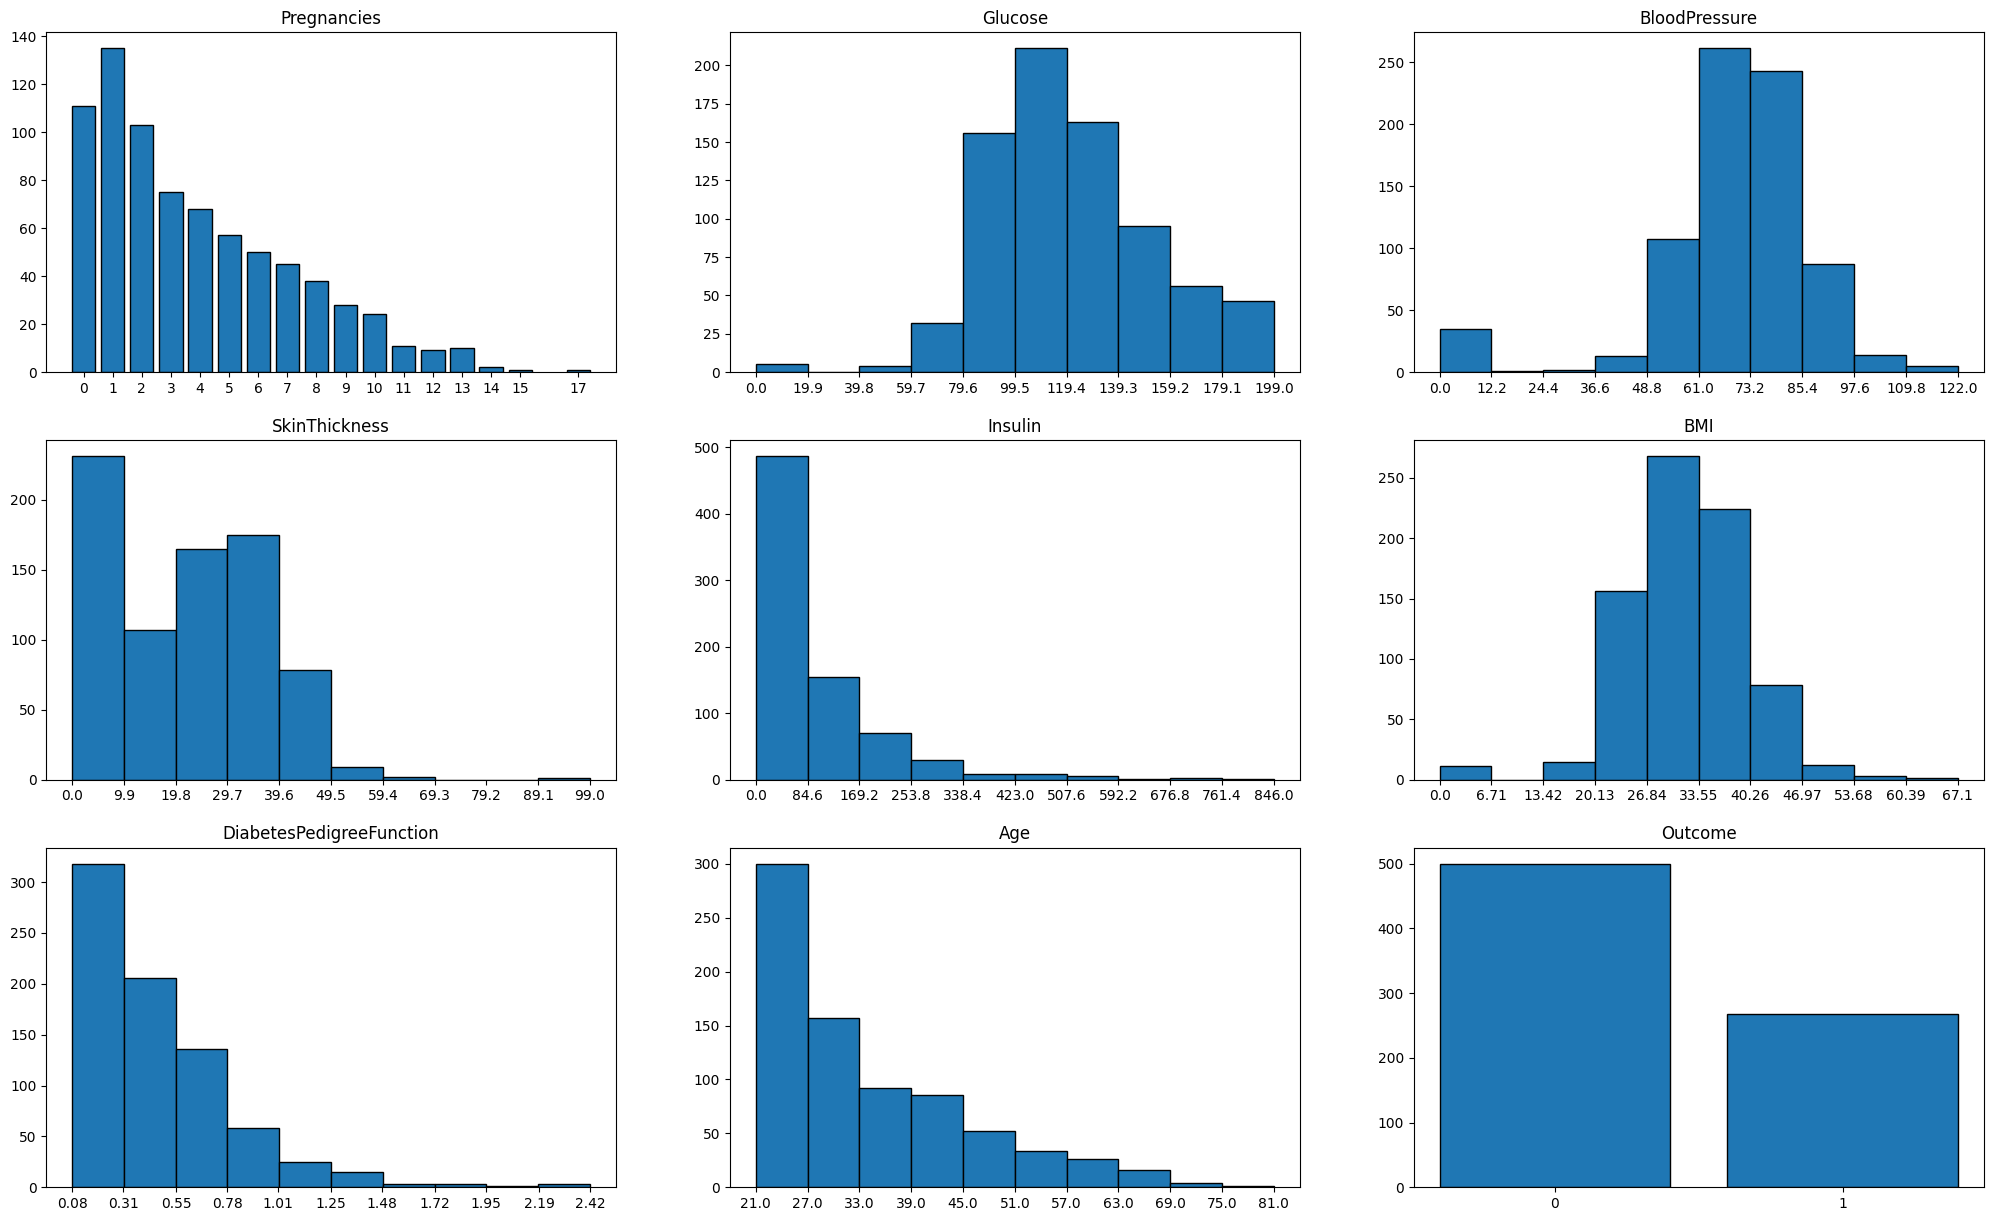

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,15))
listOfAxes = axes.flatten()
i = 0 
categoricalAttributes = ["Pregnancies", "Outcome"]

for attribute in DiabetesDataFrame.columns:
    axis = listOfAxes[i]
    axis.set_title(attribute)
    if attribute in categoricalAttributes:
        valueCount = DiabetesDataFrame[attribute].value_counts()
        x = list(valueCount.index)
        y = list(valueCount.loc[valueCount.index])
        axis.bar(x, y, edgecolor='black')
        axis.set_xticks(ticks = x, labels = x)
    else:
        (n, bins, patches) = axis.hist(DiabetesDataFrame[attribute], edgecolor='black')
        binsNew = []
        for number in bins:
            binsNew.append(round(number, 2))
        axis.set_xticks(ticks = binsNew, labels = binsNew )
        
    i += 1

### Kiểm tra sự số lượng mất cân bằng

In [21]:
import math

numberOf0 = DiabetesDataFrame["Outcome"].value_counts()[0]
numberOf1 = DiabetesDataFrame["Outcome"].value_counts()[1]
OneToZeroRatio = str(int(round(numberOf1 / (math.gcd(numberOf1, numberOf0)),0))) + ':'+ str(int(round(numberOf0 / (math.gcd(numberOf1, numberOf0)),0)))
print(f"Số lượng 0: {numberOf0}")
print(f"Số lượng 1: {numberOf1}")
print(f"Tỷ lệ 1 so với 0: {OneToZeroRatio}")

Số lượng 0: 500
Số lượng 1: 268
Tỷ lệ 1 so với 0: 67:125


### Phân tích boxplot

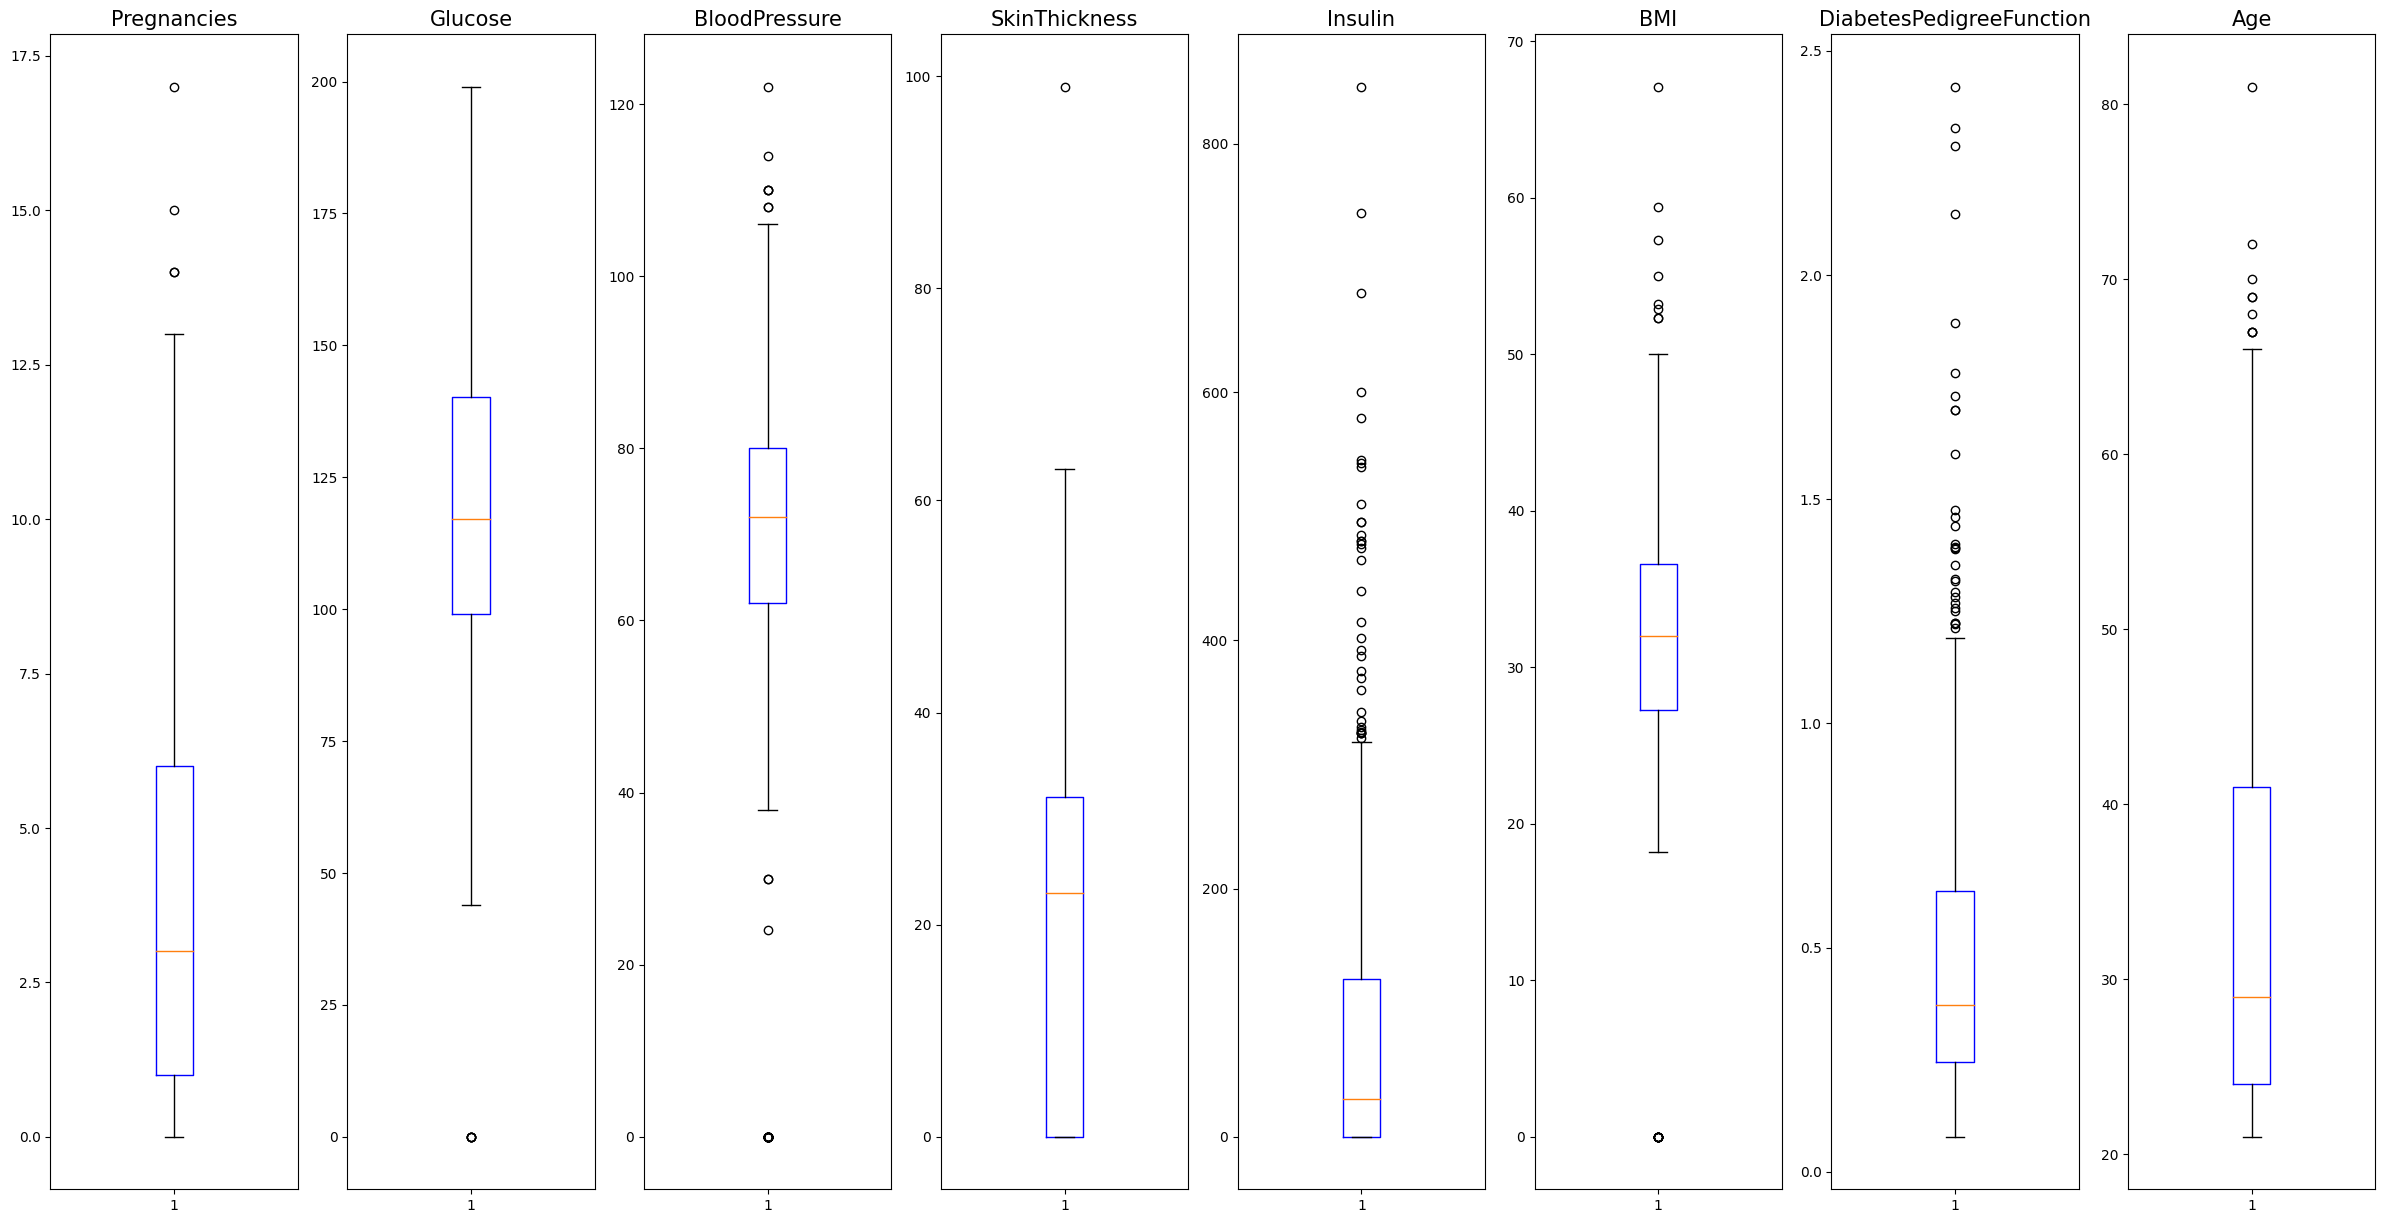

In [11]:
numericAttributes = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
fig, axes = plt.subplots(nrows = 1, ncols = 8, figsize = (30,15))
for i in range(len(axes)):
    axis = axes[i]
    attribute = numericAttributes[i]
    axis.set_title(attribute, fontdict = {"fontsize" : 15})
    axis.boxplot(DiabetesDataFrame[attribute], boxprops=dict(color="blue"))

### Các giá trị ngoại lai của từng biến và phần trăm đối tượng có giá trị ngoại loai

In [12]:
condition_ = None
i = 0
for attribute in numericAttributes:
    description = DiabetesDataFrame[attribute].describe()
    Q1 = description["25%"]
    Q3 = description["75%"]
    IQR = Q3 - Q1
    lowerLimit = Q1 - 1.5 * IQR
    upperLimit = Q3 + 1.5 * IQR
    condition = (DiabetesDataFrame[attribute] < lowerLimit) | ((DiabetesDataFrame[attribute] > upperLimit))
    if i == 0:
        condition_ = condition
        i = 1
    else:
        condition_ = condition_ | condition
    count = DiabetesDataFrame.loc[condition, attribute].count() 
    print(f"{attribute}: {count} giá trị ngoại lai")
    print(list(DiabetesDataFrame.loc[condition, attribute]))
    print()
numberOfObjectsThatHaveOutliers = condition_.sum()
print(f"Có {numberOfObjectsThatHaveOutliers} đối tượng có giá trị ngoại lai")
totalNumberOfObjects = DiabetesDataFrame.iloc[:,0].count()
percentageOfOutliers = numberOfObjectsThatHaveOutliers / totalNumberOfObjects  * 100
print(f"Phần trăm giá trị ngoại lai là {percentageOfOutliers}%")

Pregnancies: 4 giá trị ngoại lai
[15, 17, 14, 14]

Glucose: 5 giá trị ngoại lai
[0, 0, 0, 0, 0]

BloodPressure: 45 giá trị ngoại lai
[0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]

SkinThickness: 1 giá trị ngoại lai
[99]

Insulin: 34 giá trị ngoại lai
[543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]

BMI: 19 giá trị ngoại lai
[0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]

DiabetesPedigreeFunction: 29 giá trị ngoại lai
[2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]

Age: 9 giá trị ngoại lai
[69, 67, 72, 81, 67, 67, 70, 68, 69]

Có 129 đối tượng có giá trị ng

### Phân tích tương quan

[Text(0, 0.5, 'Pregnancies'),
 Text(0, 1.5, 'Glucose'),
 Text(0, 2.5, 'BloodPressure'),
 Text(0, 3.5, 'SkinThickness'),
 Text(0, 4.5, 'Insulin'),
 Text(0, 5.5, 'BMI'),
 Text(0, 6.5, 'DiabetesPedigreeFunction'),
 Text(0, 7.5, 'Age')]

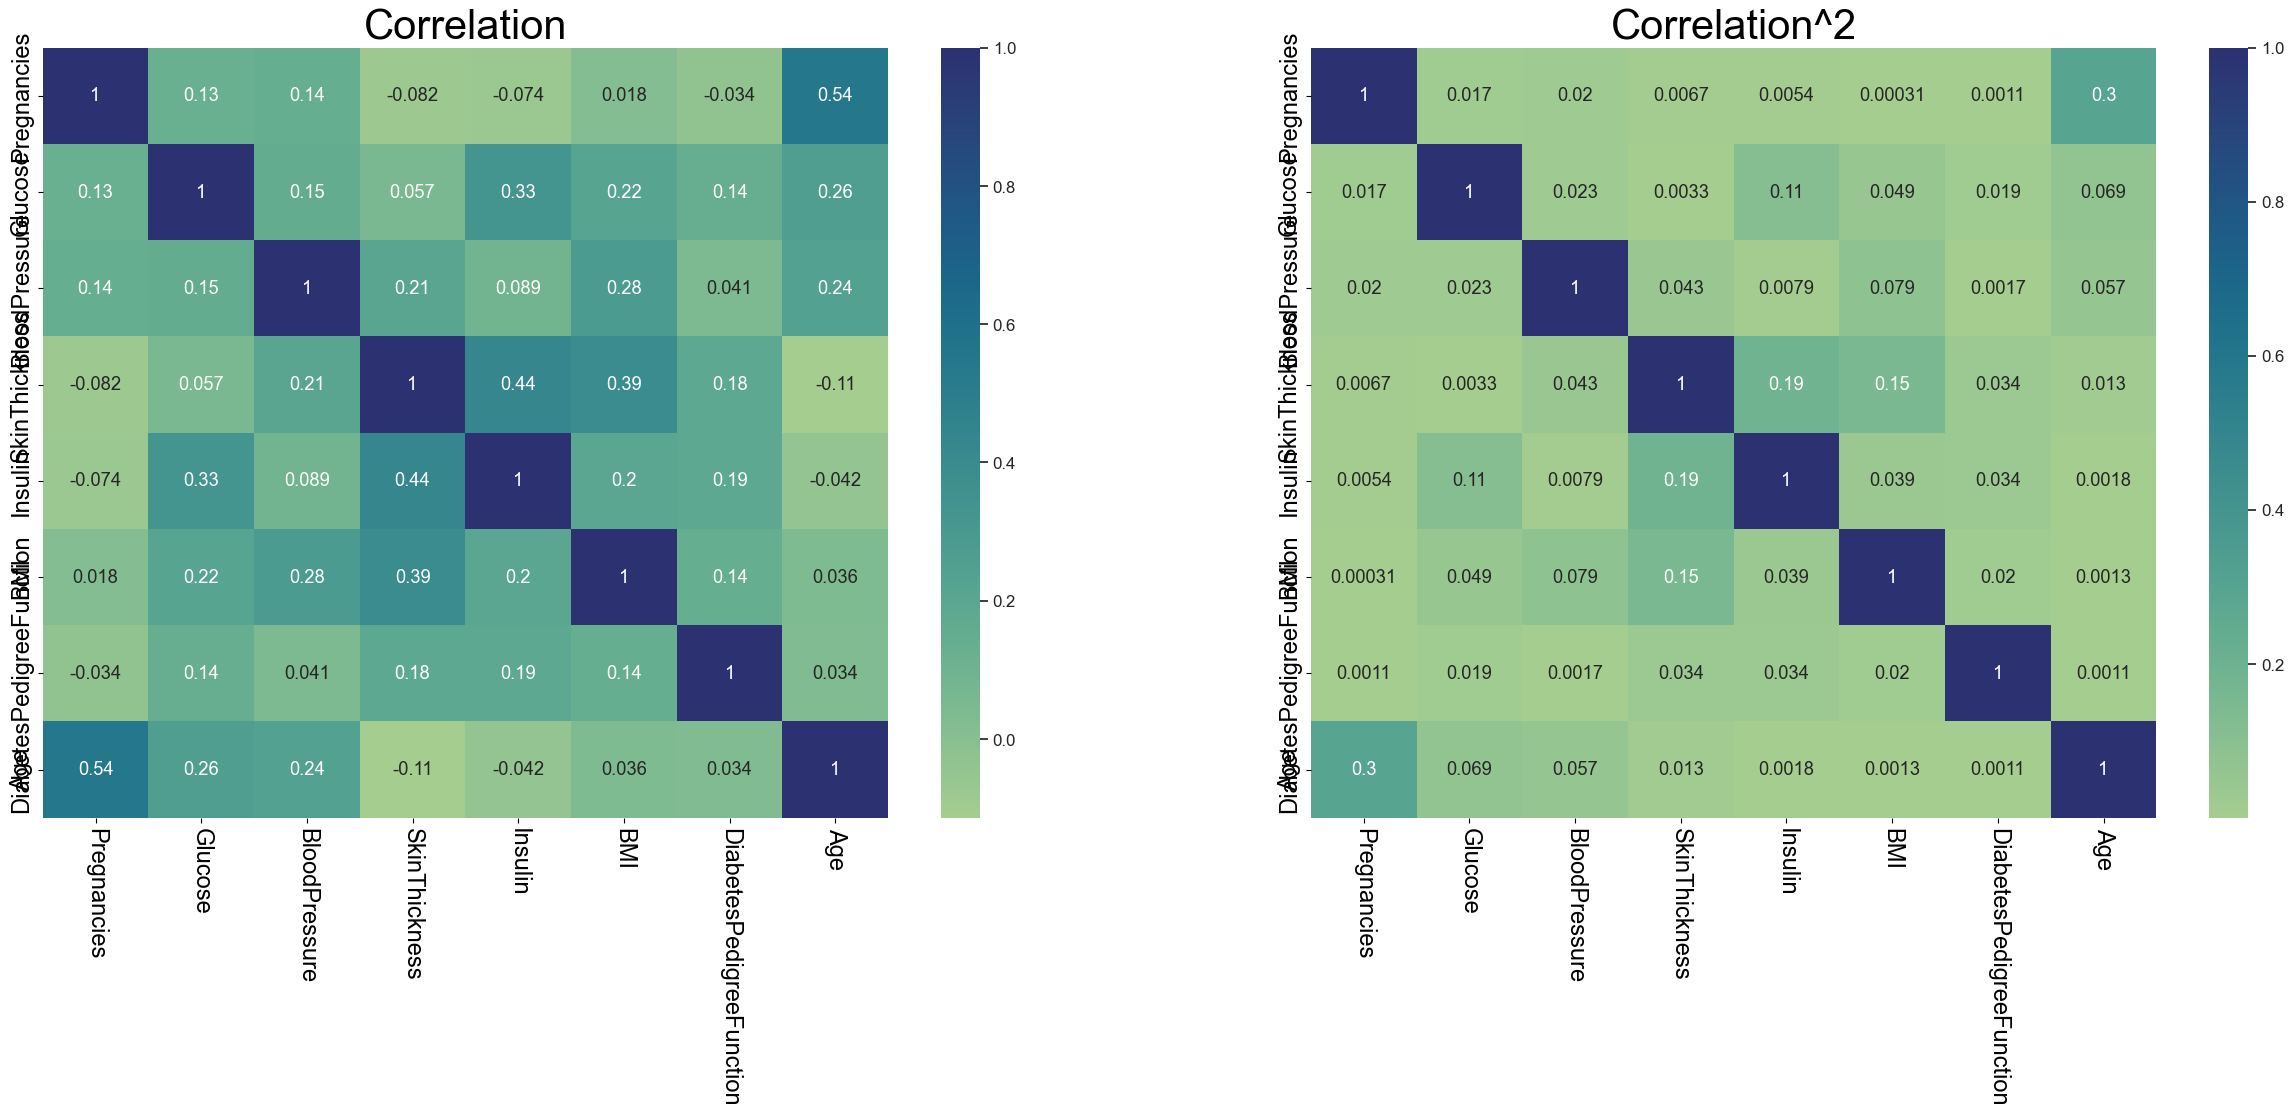

In [13]:
numericAttributes = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
axis1, axis2 = axes 
axis1.set_title("Correlation", fontsize = 30)
sn.set(font_scale = 1.1)
heatmap1 = sn.heatmap(data = DiabetesDataFrame.loc[:,numericAttributes].corr(), annot = True, ax = axis1, cmap = "crest")
heatmap1.set_xticklabels(numericAttributes, rotation = 270, fontsize = 17)
heatmap1.set_yticklabels(numericAttributes, fontsize = 17)
axis2.set_title("Correlation^2", fontsize = 30)
heatmap2 = sn.heatmap(data = DiabetesDataFrame.loc[:,numericAttributes].corr().map(lambda x : x * x)
                      , annot = True, ax = axis2, cmap = "crest")
heatmap2.set_xticklabels(numericAttributes, rotation = 270, fontsize = 17)
heatmap2.set_yticklabels(numericAttributes, fontsize = 17)

In [14]:
AttributesContainMissingValues = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
DiabetesDataFrameWithExplicitMissingValues = DiabetesDataFrame.copy(deep =True)
for attribute in AttributesContainMissingValues:
    condition = (DiabetesDataFrameWithExplicitMissingValues[attribute] == 0)
    DiabetesDataFrameWithExplicitMissingValues.loc[condition, attribute] = np.nan

### Phân tích phân bố giá trị của từng biến với các giá trị trống được chỉ rõ ra

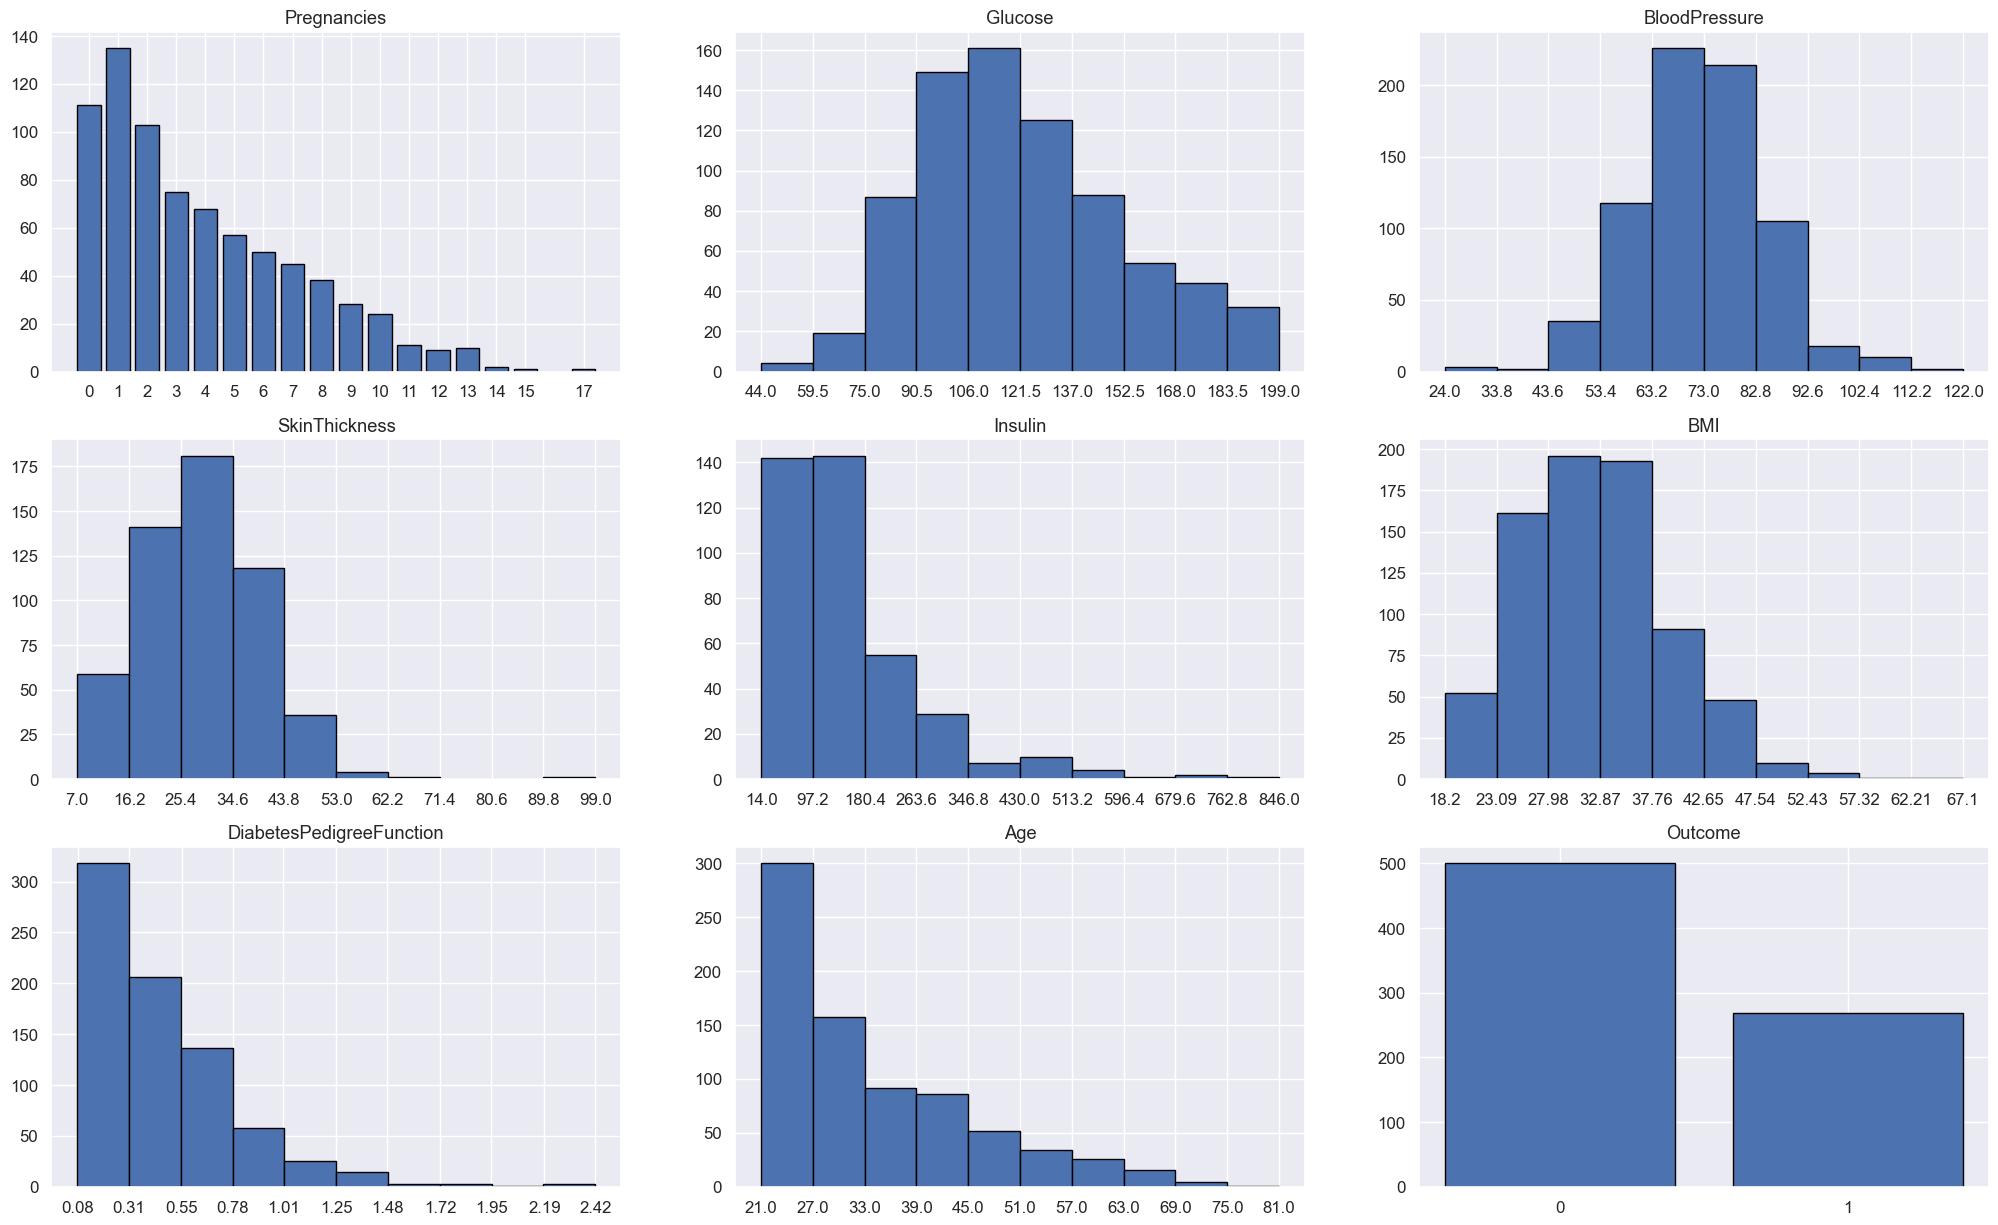

In [15]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,15))
listOfAxes = axes.flatten()
i = 0 
categoricalAttributes = ["Pregnancies", "Outcome"]

for attribute in DiabetesDataFrameWithExplicitMissingValues.columns:
    axis = listOfAxes[i]
    axis.set_title(attribute)
    if attribute in categoricalAttributes:
        valueCount = DiabetesDataFrameWithExplicitMissingValues[attribute].value_counts()
        x = list(valueCount.index)
        y = list(valueCount.loc[valueCount.index])
        axis.bar(x, y, edgecolor='black')
        axis.set_xticks(ticks = x, labels = x)
    else:
        (n, bins, patches) = axis.hist(DiabetesDataFrameWithExplicitMissingValues[attribute], edgecolor='black')
        binsNew = []
        for number in bins:
            binsNew.append(round(number, 2))
        axis.set_xticks(ticks = binsNew, labels = binsNew )
        
    i += 1

### Phân tích boxplot của từng biến với các giá trị trống được chỉ rõ ra

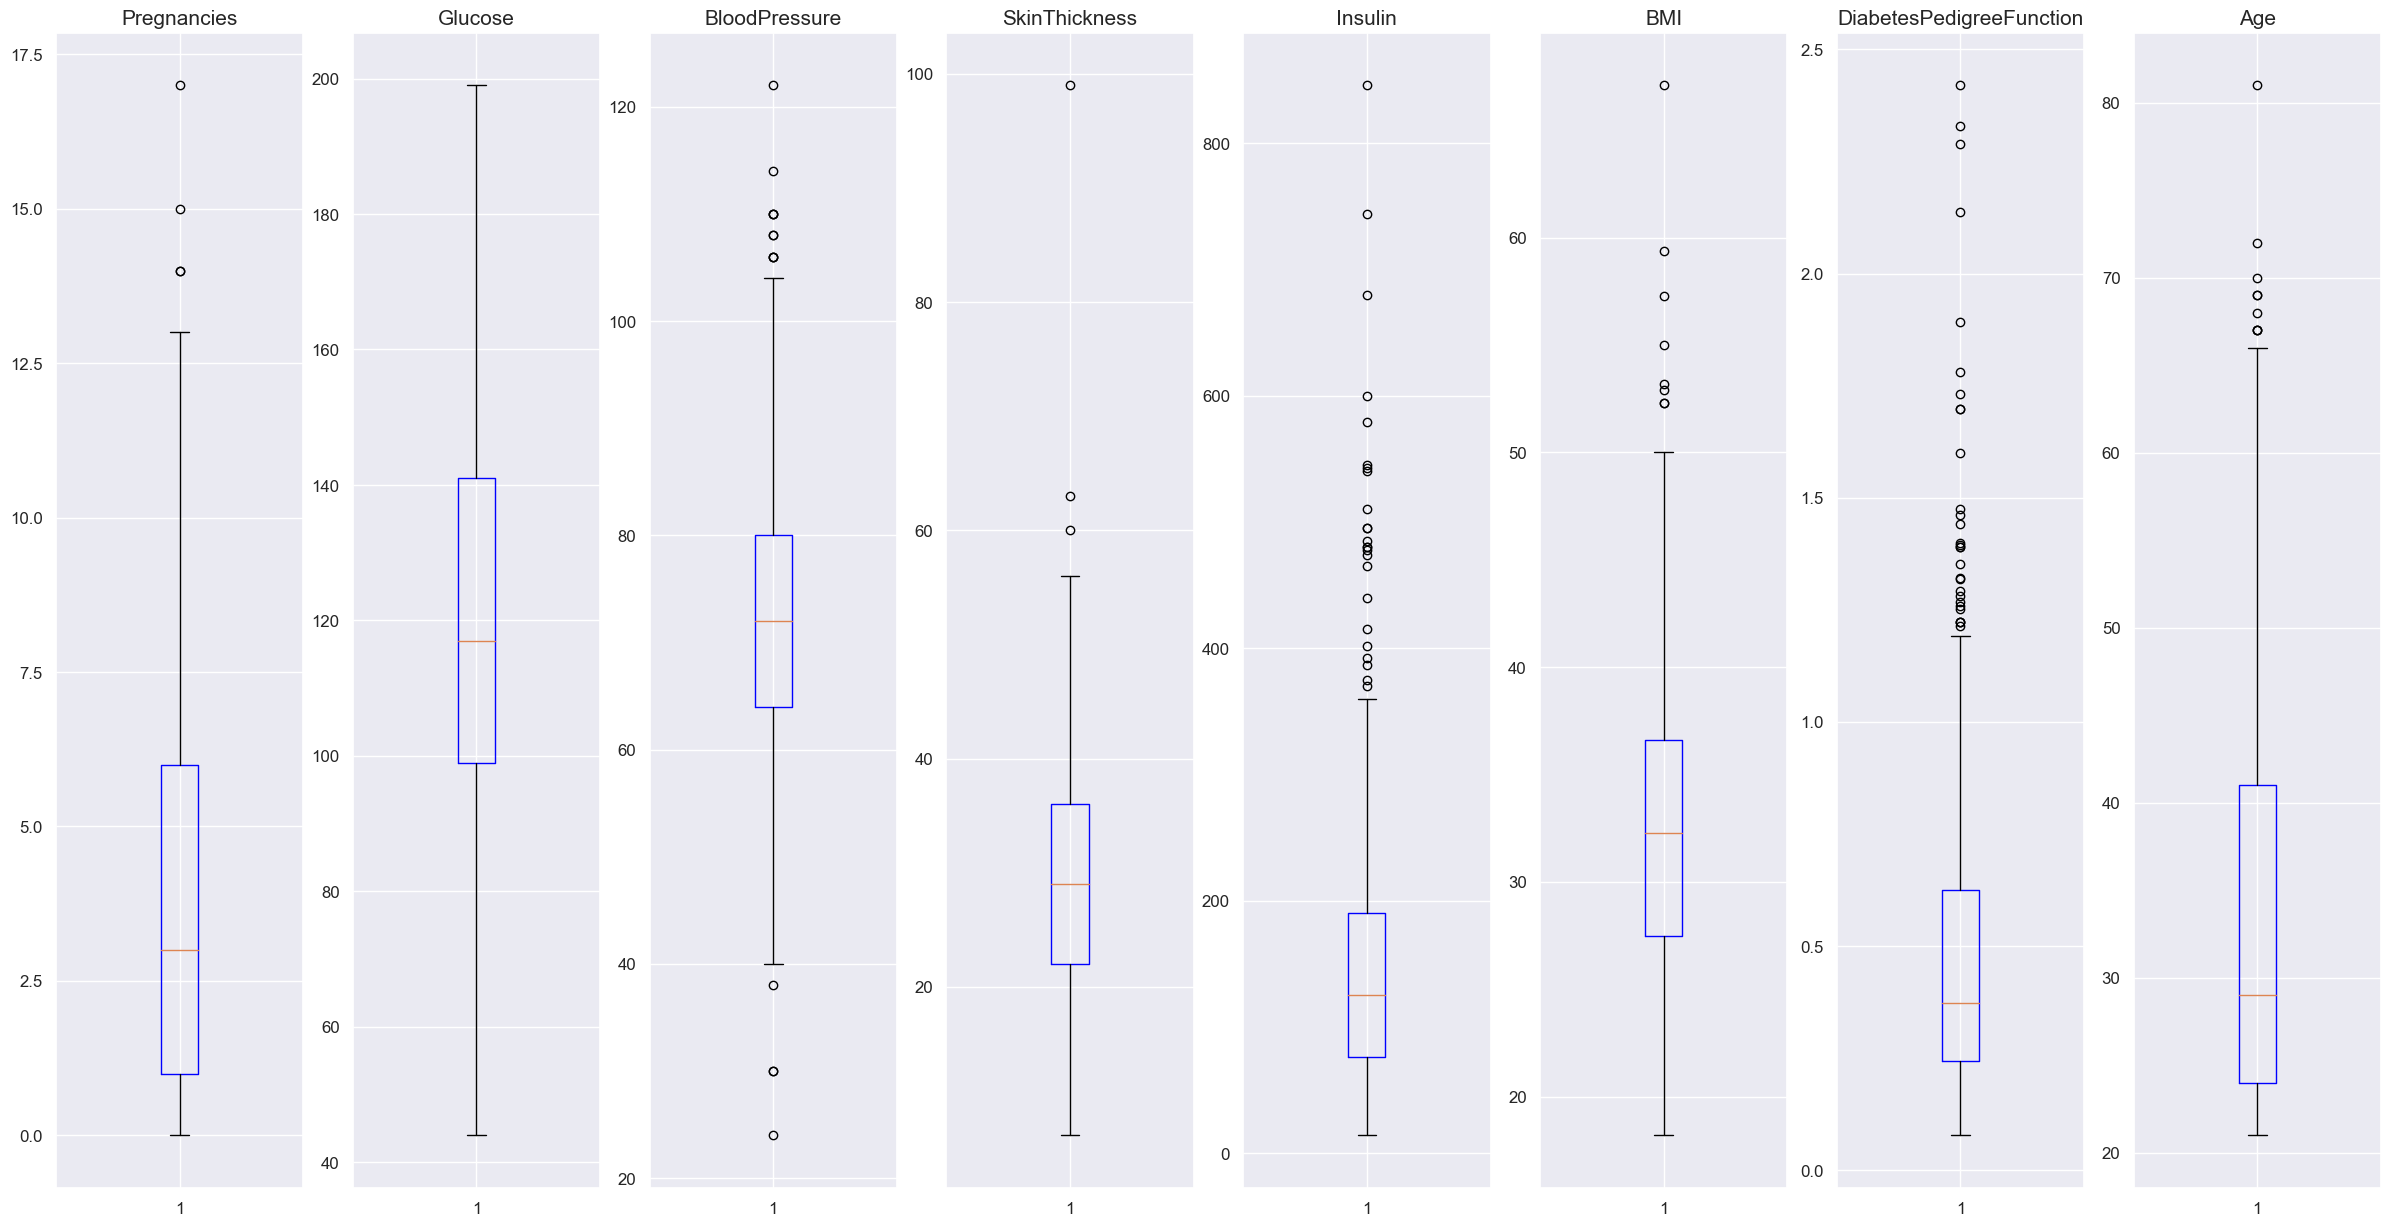

In [16]:
numericAttributes = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
fig, axes = plt.subplots(nrows = 1, ncols = 8, figsize = (30,15))
for i in range(len(axes)):
    axis = axes[i]
    attribute = numericAttributes[i]
    axis.set_title(attribute, fontdict = {"fontsize" : 15})
    condition = ~(DiabetesDataFrameWithExplicitMissingValues[attribute].isna())
    axis.boxplot(DiabetesDataFrameWithExplicitMissingValues.loc[condition, attribute], boxprops=dict(color="blue"))

### Các giá trị ngoại lai của từng biến và phần trăm đối tượng có giá trị ngoại loai với các giá trị trống được chỉ rõ ra

In [17]:
condition_ = None
i = 0
for attribute in numericAttributes:
    description = DiabetesDataFrameWithExplicitMissingValues[attribute].describe()
    Q1 = description["25%"]
    Q3 = description["75%"]
    IQR = Q3 - Q1
    lowerLimit = Q1 - 1.5 * IQR
    upperLimit = Q3 + 1.5 * IQR
    condition = (DiabetesDataFrameWithExplicitMissingValues[attribute] < lowerLimit) | 
    ((DiabetesDataFrameWithExplicitMissingValues[attribute] > upperLimit))
    if i == 0:
        condition_ = condition
        i = 1
    else:
        condition_ = condition_ | condition
    count = DiabetesDataFrameWithExplicitMissingValues.loc[condition, attribute].count() 
    print(f"{attribute}: {count} giá trị ngoại lai")
    print(list(DiabetesDataFrameWithExplicitMissingValues.loc[condition, attribute]))
    print()

numberOfObjectsThatHaveOutliers = DiabetesDataFrameWithExplicitMissingValues[condition_].iloc[:,0].count()
totalNumberOfObjects = DiabetesDataFrameWithExplicitMissingValues.iloc[:,0].count()
percentageOfOutliers = numberOfObjectsThatHaveOutliers / totalNumberOfObjects  * 100
print(f"Phần trăm giá trị ngoại lai là {percentageOfOutliers}%")

Pregnancies: 4 giá trị ngoại lai
[15, 17, 14, 14]

Glucose: 0 giá trị ngoại lai
[]

BloodPressure: 14 giá trị ngoại lai
[30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 108.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]

SkinThickness: 3 giá trị ngoại lai
[60.0, 63.0, 99.0]

Insulin: 24 giá trị ngoại lai
[543.0, 846.0, 495.0, 485.0, 495.0, 478.0, 744.0, 370.0, 680.0, 402.0, 375.0, 545.0, 465.0, 415.0, 579.0, 474.0, 480.0, 600.0, 440.0, 540.0, 480.0, 387.0, 392.0, 510.0]

BMI: 8 giá trị ngoại lai
[53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]

DiabetesPedigreeFunction: 29 giá trị ngoại lai
[2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]

Age: 9 giá trị ngoại lai
[69, 67, 72, 81, 67, 67, 70, 68, 69]

Phần trăm giá trị ngoại lai là 10.9375%


### Phân tích tương quan với các giá trị trống được chỉ rõ ra

[Text(0, 0.5, 'Pregnancies'),
 Text(0, 1.5, 'Glucose'),
 Text(0, 2.5, 'BloodPressure'),
 Text(0, 3.5, 'SkinThickness'),
 Text(0, 4.5, 'Insulin'),
 Text(0, 5.5, 'BMI'),
 Text(0, 6.5, 'DiabetesPedigreeFunction'),
 Text(0, 7.5, 'Age')]

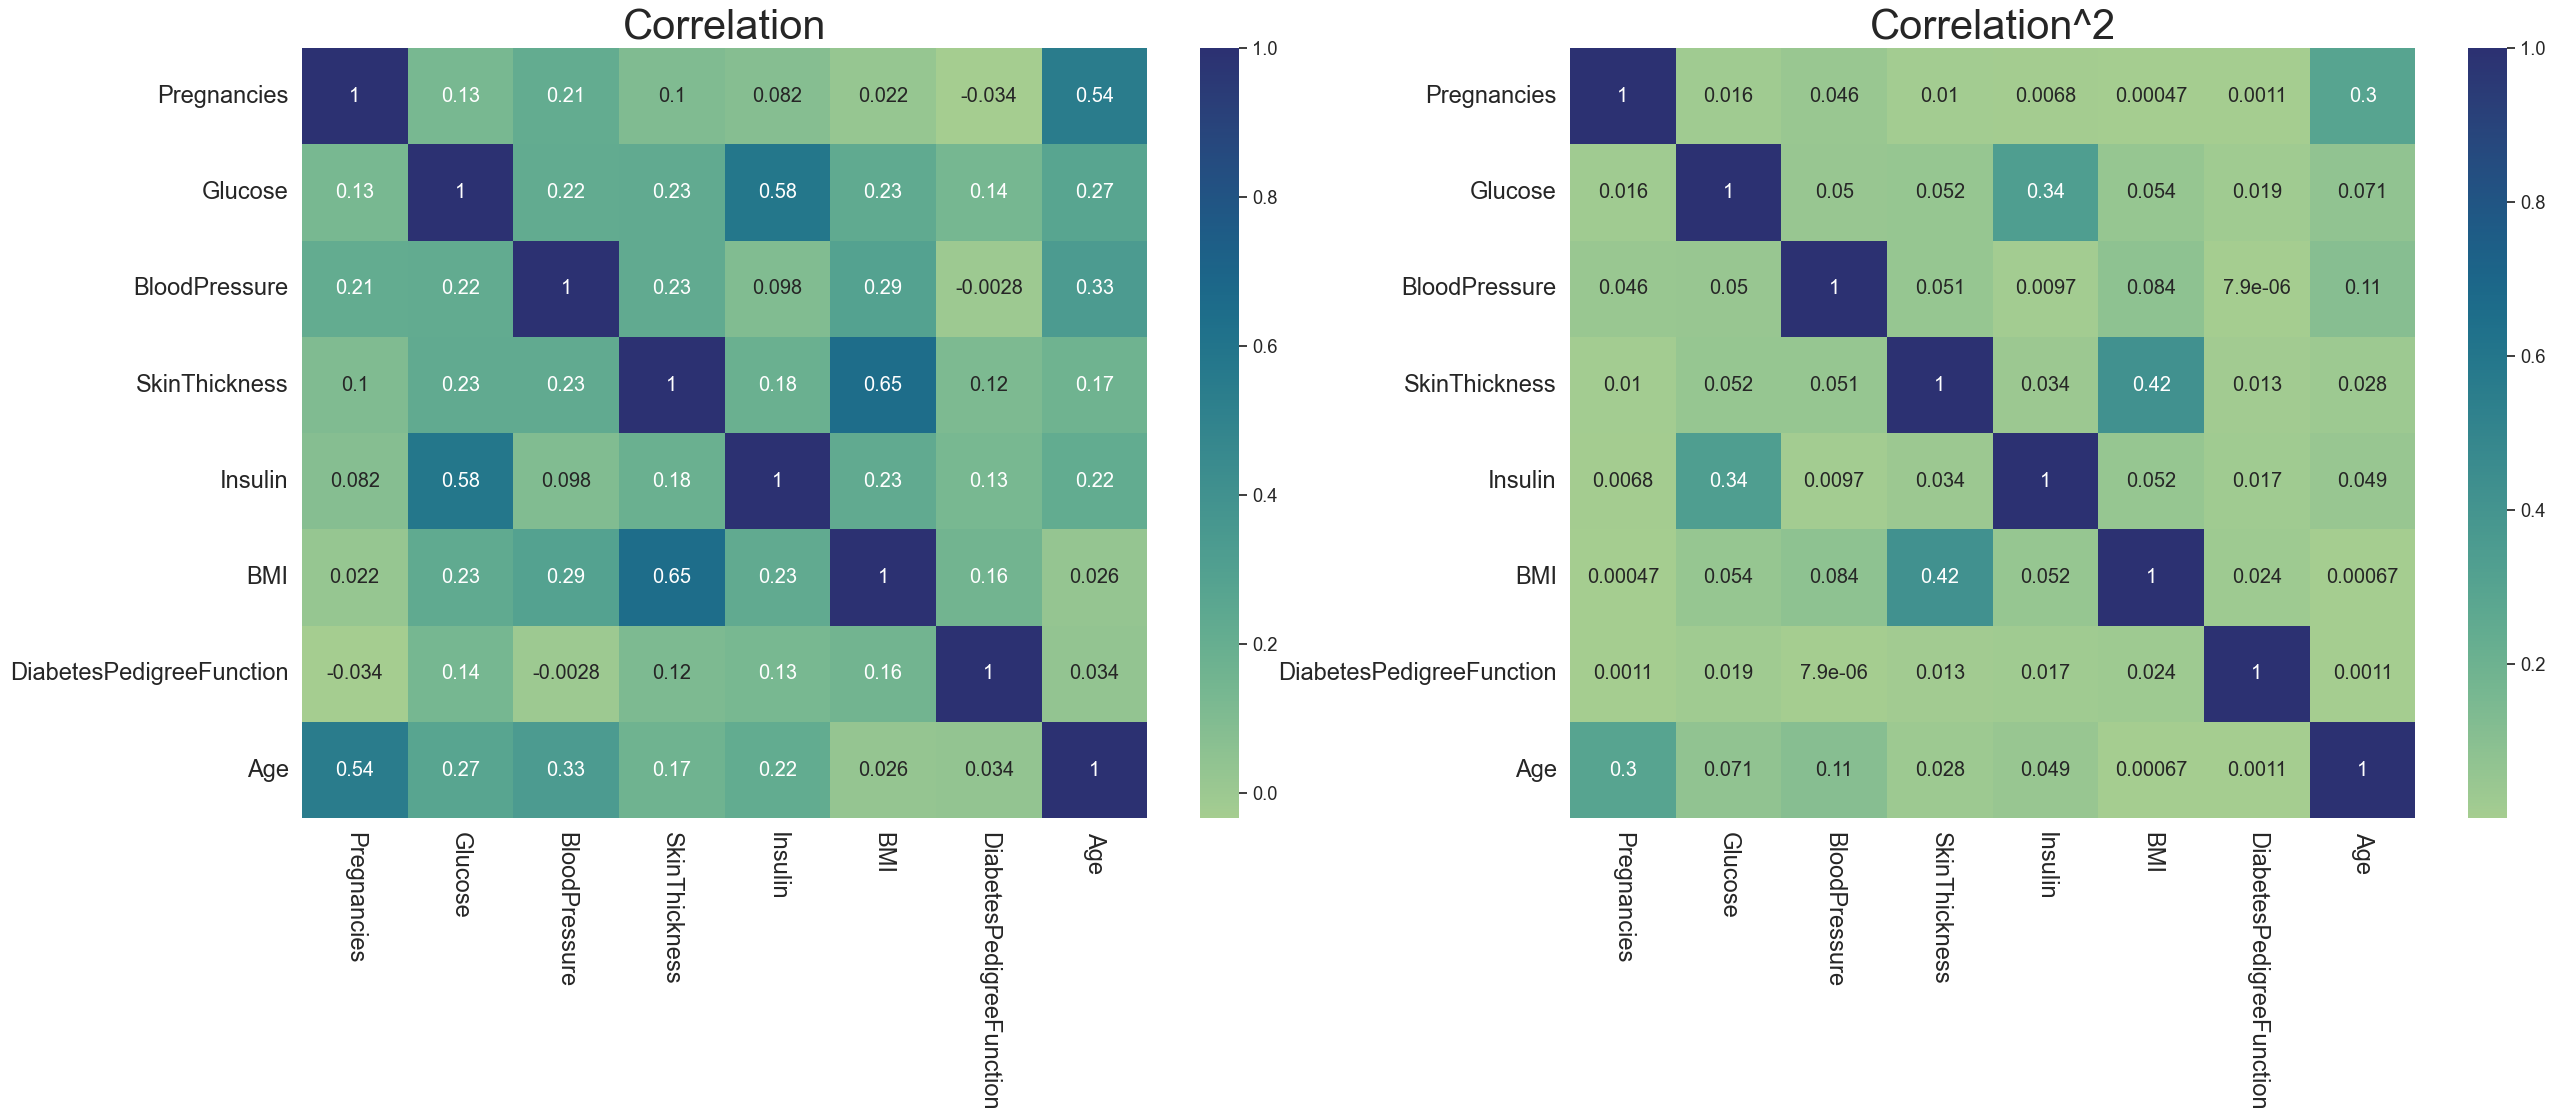

In [18]:
numericAttributes = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
axis1, axis2 = axes 
axis1.set_title("Correlation", fontsize = 30)
sn.set(font_scale = 1.2)
heatmap1 = sn.heatmap(data = DiabetesDataFrameWithExplicitMissingValues.loc[:,numericAttributes].corr(), 
                      annot = True, ax = axis1, cmap = "crest")
heatmap1.set_xticklabels(numericAttributes, rotation = 270, fontsize = 17)
heatmap1.set_yticklabels(numericAttributes, fontsize = 17)

axis2.set_title("Correlation^2", fontsize = 30)
heatmap2 = sn.heatmap(data = DiabetesDataFrameWithExplicitMissingValues.loc[:,numericAttributes].corr().map(lambda x : x * x), 
                      annot = True, ax = axis2, cmap = "crest")
heatmap2.set_xticklabels(numericAttributes, rotation = 270, fontsize = 17)
heatmap2.set_yticklabels(numericAttributes, fontsize = 17)